<a href="https://colab.research.google.com/github/knightligh/AI/blob/main/tu%E1%BA%A7n11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras import models  
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
(train_X,train_Y),(test_X,test_Y)=fashion_mnist.load_data()
print(train_X.shape)
print(test_X.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Text(0.5, 1.0, 'so: 8')

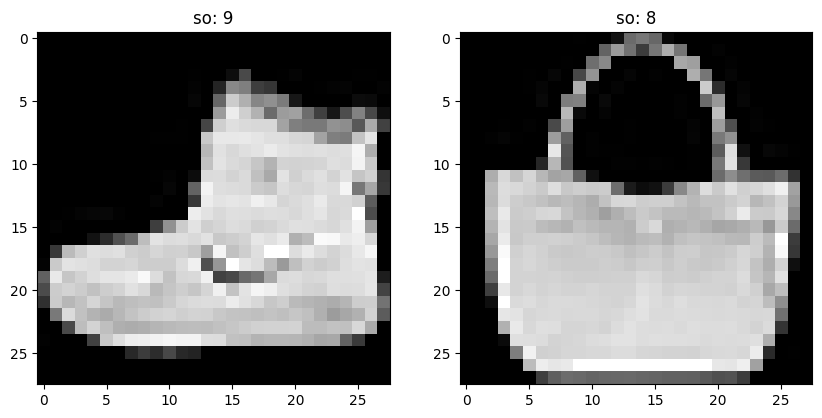

In [3]:
plt.figure(figsize=[10,10])
plt.subplot(121)
plt.imshow(train_X[0],cmap='gray')
plt.title('so: {}'.format(train_Y[0]))
plt.subplot(122)
plt.imshow(train_X[100],cmap='gray')
plt.title('so: {}'.format(train_Y[100]))

In [4]:
train_X=train_X.reshape(60000,28,28,1)
test_X=test_X.reshape(10000,28,28,1)
train_X.shape ,test_X.shape
train_X=train_X.astype('float32')
train_X=train_X/255

In [5]:
from keras.utils import to_categorical
train_Y=to_categorical(train_Y)
test_Y=to_categorical(test_Y)
test_Y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# có 2 phần trong mô hình gồm : CNN và sau đó là ANN

In [6]:
from keras import models 
from keras.models import Sequential,Model
from keras import Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization
from keras.optimizers import Adam #Adam là tốc độ học gồm 2 giá trị bên trong là tốc độ học và moment động lượng 
batch_size=64 #lô 
epochs=20 # số lần học 
classes = 10 # phân loại 


In [7]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

#64 lần nhân tích chập
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

#128 lần nhân tích chập
model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))


In [8]:
model.add(Flatten())#chuyển tính hiệu vào thành tín hiệu phẳng 
#mạng ANN
from keras import losses
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train=model.fit(train_X,train_Y,batch_size=batch_size,epochs=epochs,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

Test loss: 153.43740844726562
Test accuracy: 0.847000002861023


Text(0.5, 1.0, 'Training & Testing Accuracy')

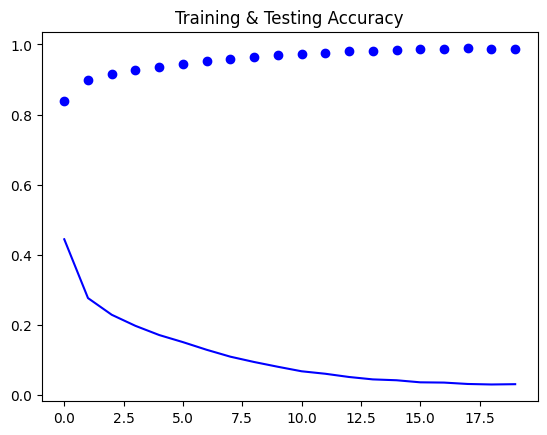

In [14]:
eval=model.evaluate(test_X,test_Y,verbose=0)
print('Test loss:',eval[0])
print('Test accuracy:',eval[1])
accuracy=train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Trianing Accuracy')
plt.plot(epochs,loss,'b',label='Test Accuracy')
plt.title('Training & Testing Accuracy')

In [15]:
from google.colab import drive
drive.mount('/content/drive')
model.save("/content/drive/MyDrive/Colab Notebooks/train.h5")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
